In [19]:
import pandas as pd
import numpy as np
import json
import urllib

import matplotlib.pyplot as plt
import time

import rpy2
%load_ext rpy2.ipython 

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [20]:
# df = pd.read_csv('./data/solar_radiation2.csv')

In [21]:
train = pd.read_csv('./data2/train.csv')
train.head()

,region,solar_radiation,date
0,북춘천,0.0,2022-06-01-00:00
1,북춘천,0.0,2022-06-01-01:00
2,북춘천,0.0,2022-06-01-02:00
3,북춘천,0.0,2022-06-01-03:00
4,북춘천,0.0,2022-06-01-04:00


In [22]:
%R -i train

In [25]:
%%R 
library(data.table)
library(tidyverse)
library(dplyr)
library(corrplot)
library(lubridate)
library(EPT)

In [24]:
%%R
for (i in 1:44){
     assign(paste0('data',1:44)[i],train |> filter(region == unique(train$region)[i]))
     assign(paste0('data',1:44)[i],eval(parse(text=paste0('data',i)))[order(eval(parse(text=paste0('data',i)))$date),])
     assign(paste0('y',1:44)[i], eval(parse(text=paste0('data',i)))$solar_radiation)
}

In [14]:
# %%R
# ept = function(y){
#     EpM = eptransf(signal=y,tau=12,process=c("envelope","average"))$EpM
#     EpM*2
# }

In [26]:
%%R
library(tictoc)
tic('지역별 yU계산')
for (i in 1:44){
    assign(paste0('yU',1:44)[i], ept(eval(parse(text=paste0('y',i)))))
}
toc()

지역별 yU계산: 76.7 sec elapsed


In [14]:
# %%R
# for (i in 1:44){
#     plot(eval(parse(text=paste0('y',i)))[1:30], ann=FALSE)
#     lines(eval(parse(text=paste0('y',i))),lty=2)
#     title(main = as.character(unique(train$region)[i]), xlab='time', ylab='solar radiation')
#     }

In [8]:
%%R
yU = read.csv('./data2/df_yU.csv')
head(yU)

     yU1    yU2    yU3    yU4    yU5    yU6   yU7    yU8   yU9   yU10   yU11
1 3.4188 3.3796 3.7984 3.2444 3.8588 3.6364 3.594 3.7128 3.606 3.6568 3.6588
2 3.4188 3.3796 3.7984 3.2444 3.8588 3.6364 3.594 3.7128 3.606 3.6568 3.6588
3 3.4188 3.3796 3.7984 3.2444 3.8588 3.6364 3.594 3.7128 3.606 3.6568 3.6588
4 3.4188 3.3796 3.7984 3.2444 3.8588 3.6364 3.594 3.7128 3.606 3.6568 3.6588
5 3.4188 3.3796 3.7984 3.2444 3.8588 3.6364 3.594 3.7128 3.606 3.6568 3.6588
6 3.4188 3.3796 3.7984 3.2444 3.8588 3.6364 3.594 3.7128 3.606 3.6568 3.6588
    yU12   yU13   yU14   yU15  yU16   yU17  yU18   yU19   yU20   yU21  yU22
1 3.5424 3.6172 3.7636 3.5844 3.598 3.6256 3.328 3.3792 3.4756 3.4088 3.668
2 3.5424 3.6172 3.7636 3.5844 3.598 3.6256 3.328 3.3792 3.4756 3.4088 3.668
3 3.5424 3.6172 3.7636 3.5844 3.598 3.6256 3.328 3.3792 3.4756 3.4088 3.668
4 3.5424 3.6172 3.7636 3.5844 3.598 3.6256 3.328 3.3792 3.4756 3.4088 3.668
5 3.5424 3.6172 3.7636 3.5844 3.598 3.6256 3.328 3.3792 3.4756 3.4088 3.668
6 3.5

In [26]:
%%R
colnames(train)

[1] "region"          "solar_radiation" "date"           


> 힌남노 :  2022년 제11호 태풍으로, 8월 28일 발생하여 9월 6일에 온대저기압으로 변질되어 소멸되었다.

기후관측 사상 아열대성 해양이 아닌 북위 25도선 이북의 바다에서 발생한 첫 번째 슈퍼태풍이다. 본래 일본 남쪽 해상에서 태풍으로 발달하여 대만과 중국 방향으로 서진하고 있었으나, 오키나와 일대에서 급격히 방향을 바꿔서 한반도로 북상하여 영향을 준 태풍이다. 고위도에서 최전성기를 맞이하고 재발달까지 했으며, 이동속도 역시 빠른 편이었기에 상당히 강력한 위력을 유지한 채로 북상하여 한반도에 내습하였고, 9월 6일 새벽에 경남 거제 일대에 상륙하여 스치듯 내륙을 통과한 뒤 아침에 동해상으로 빠져나가 저녁에 소멸하였다.[13]

경상북도 포항시와 경주시를 중심으로 부울경 지역, 제주특별자치도 등에 상당한 피해를 입혔으며 특히 포항시가 심각한 피해를 입었다. 포항제철소가 창립 이래 최초로 전면 가동이 중단되는 사태가 발생하는 등 약 1조 7300억 원이라는 막대한 재산적 피해가 유발되었고, 이는 루사와 매미, 에위니아에 이은 역대 4위에 해당한다.

서울 // 포항 부산 울산 경주

In [30]:
pd.Series(train.region.unique())

0     북춘천
1      철원
2     대관령
3      춘천
4     백령도
5     북강릉
6      강릉
7      서울
8      인천
9      원주
10    울릉도
11     수원
12     서산
13     청주
14     대전
15    추풍령
16     안동
17     포항
18     대구
19     전주
20     창원
21     광주
22     부산
23     목포
24     여수
25    흑산도
26     고창
27     홍성
28     제주
29     고산
30     진주
31    고창군
32    영광군
33    김해시
34    순창군
35    북창원
36    양산시
37    보성군
38    강진군
39    의령군
40    함양군
41    광양시
42    청송군
43    경주시
dtype: object

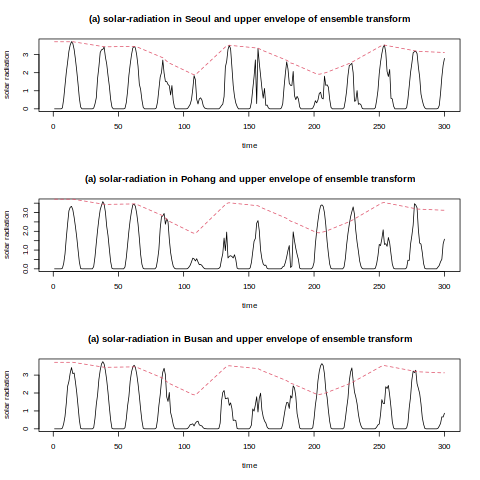

In [50]:
%%R
# windows(width=3, height=3)
par(mfrow=c(3,1))
plot(eval(parse(text=paste0('y',8)))[1:300], type='l', ann=FALSE)
lines(yU[1:300,8],col = 2, lty=2)
# title(main = as.character(unique(train$region)[8]), xlab='time', ylab='solar radiation')
title(main = '(a) solar-radiation in Seoul and upper envelope of ensemble transform', xlab='time', ylab='solar radiation')

plot(eval(parse(text=paste0('y',18)))[1:300], type='l', ann=FALSE)
lines(yU[1:300,8],col = 2, lty=2)
# title(main = as.character(unique(train$region)[18]), xlab='time', ylab='solar radiation')
title(main = '(a) solar-radiation in Pohang and upper envelope of ensemble transform', xlab='time', ylab='solar radiation')

plot(eval(parse(text=paste0('y',23)))[1:300], type='l', ann=FALSE)
lines(yU[1:300,8],col = 2, lty=2)
# title(main = as.character(unique(train$region)[23]), xlab='time', ylab='solar radiation')
title(main = '(a) solar-radiation in Busan and upper envelope of ensemble transform', xlab='time', ylab='solar radiation')

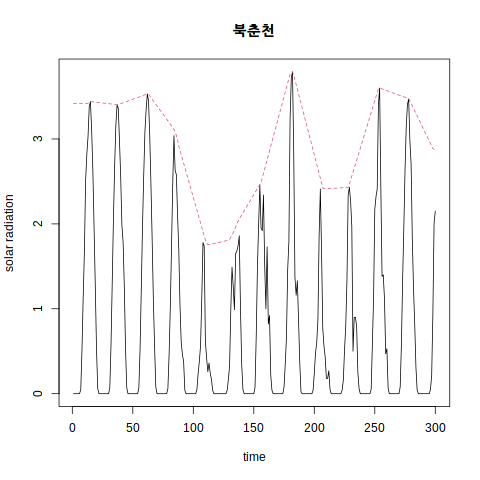

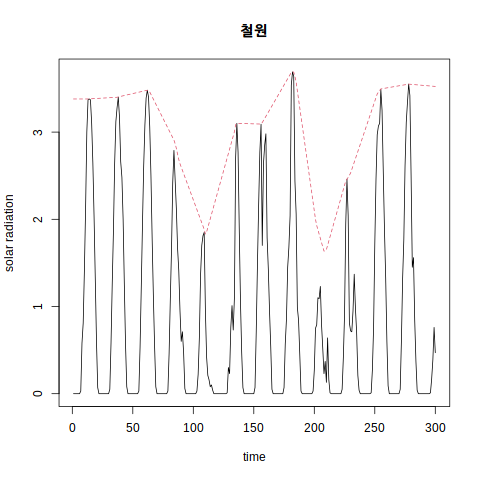

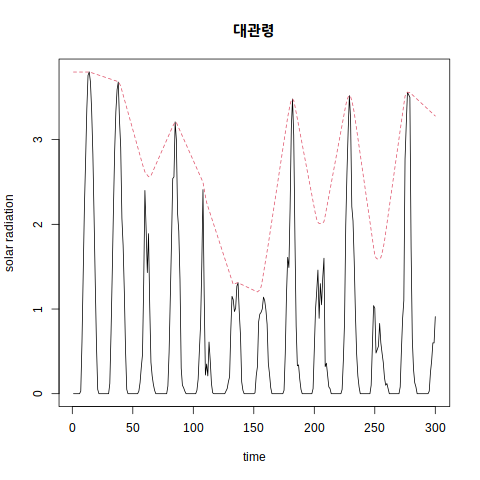

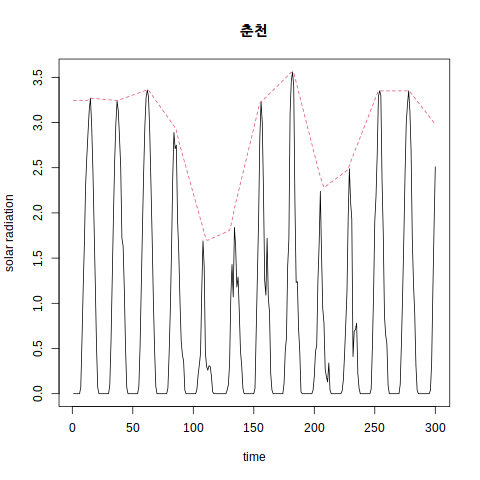

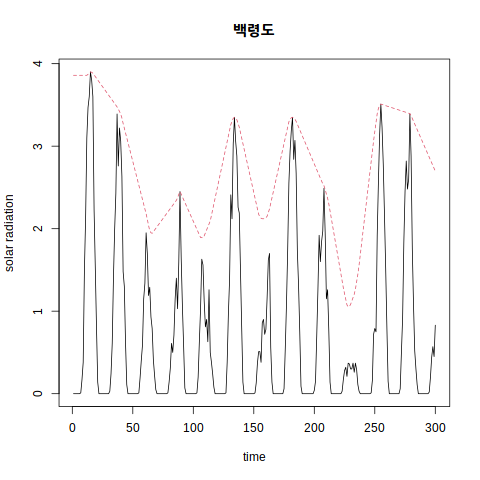

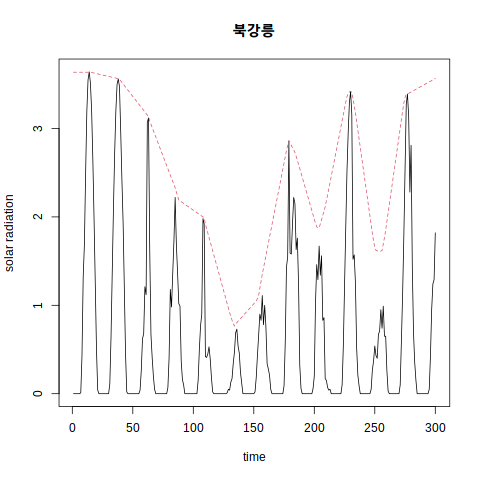

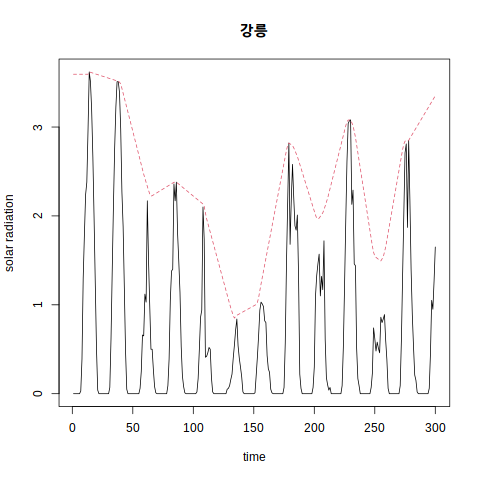

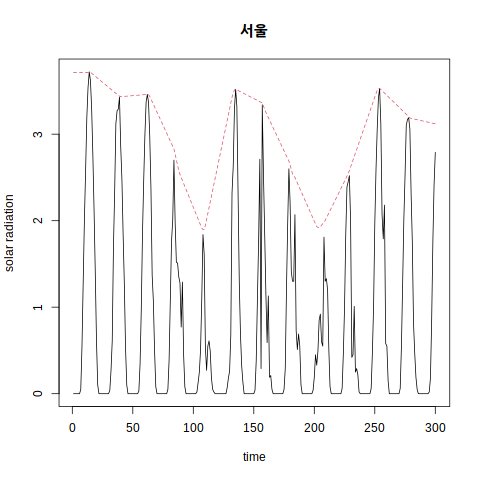

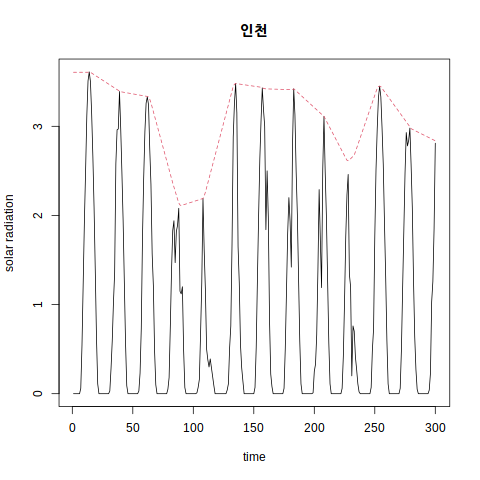

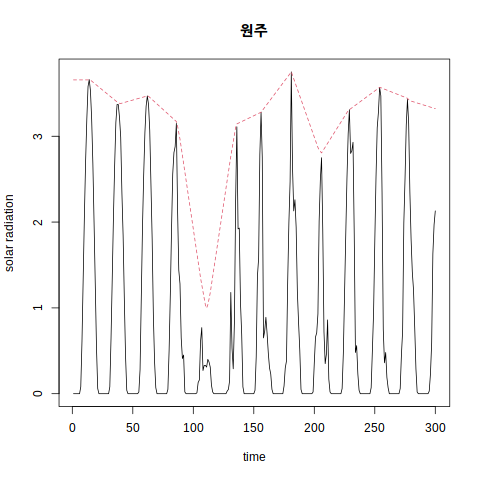

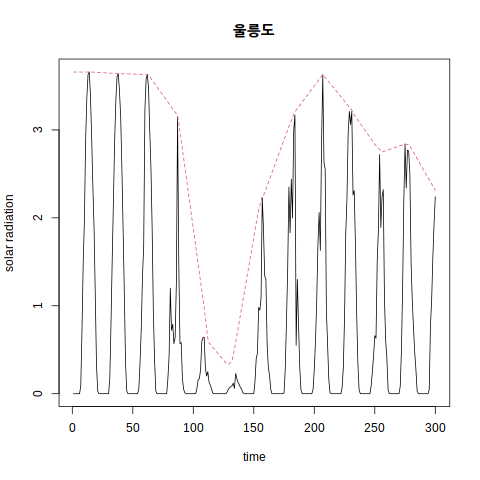

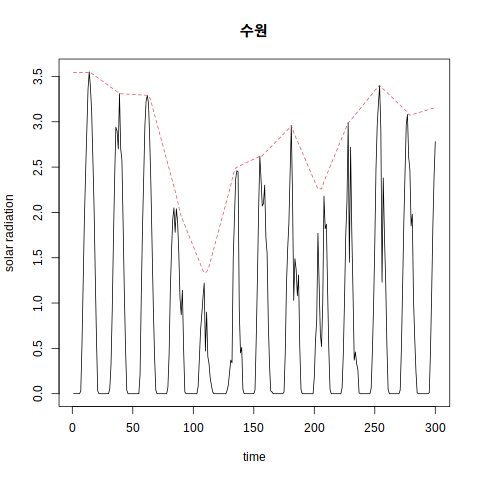

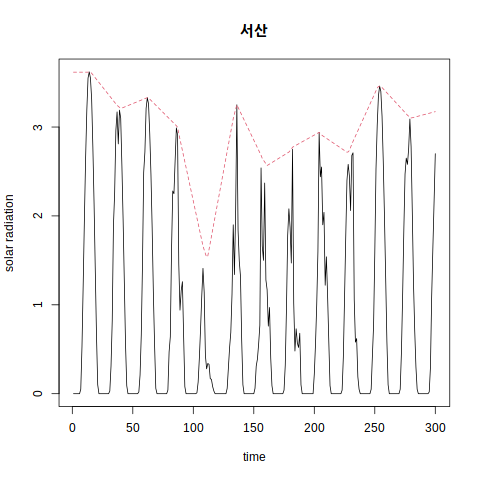

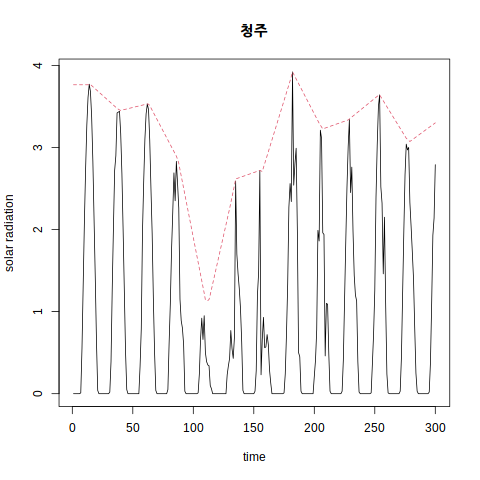

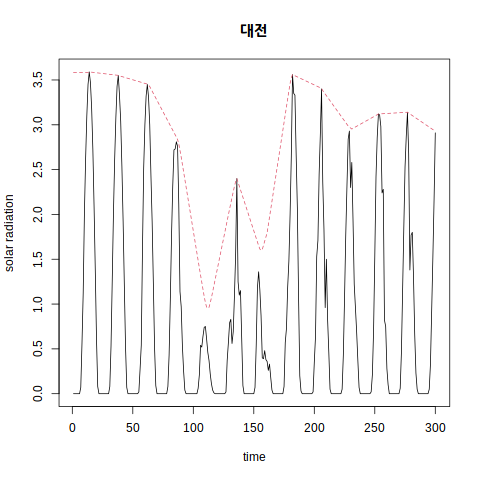

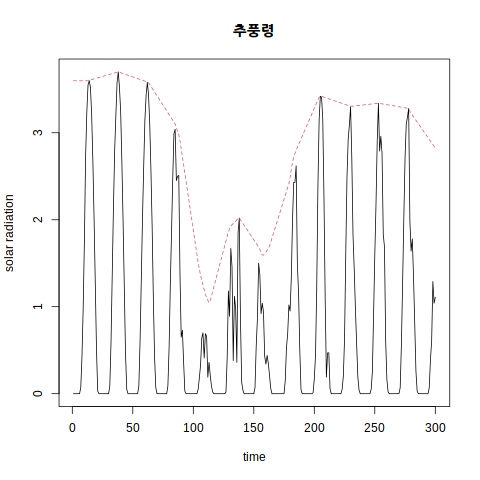

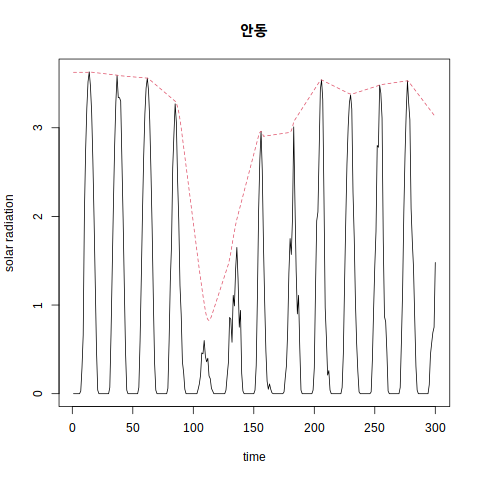

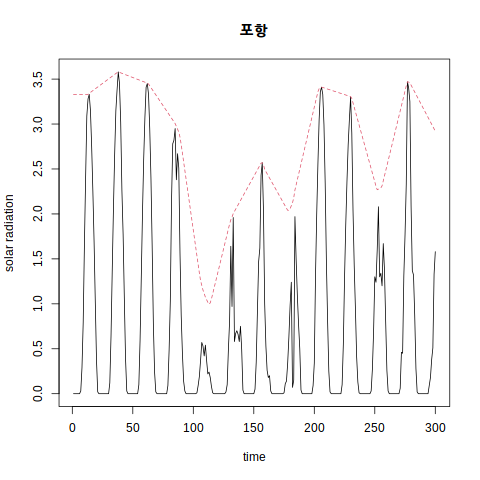

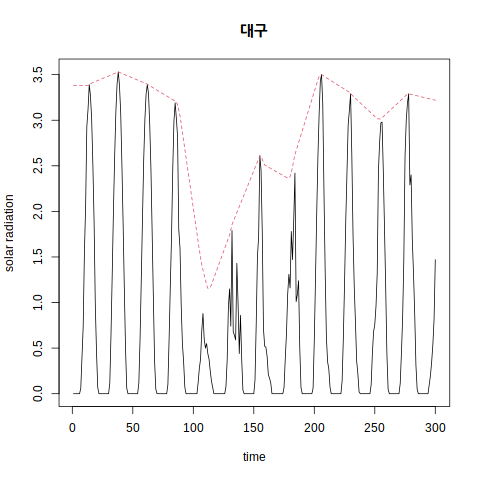

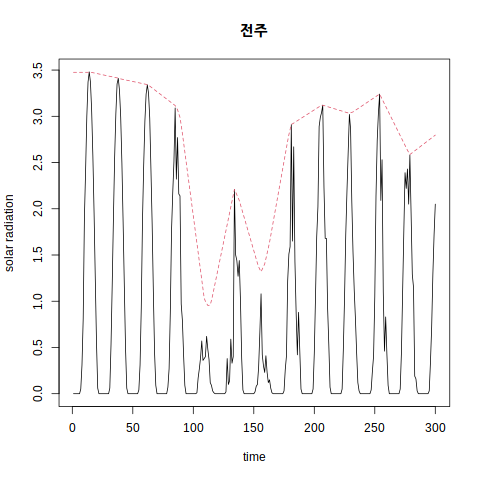

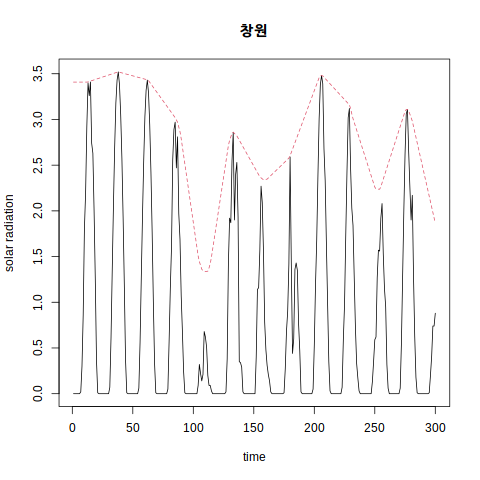

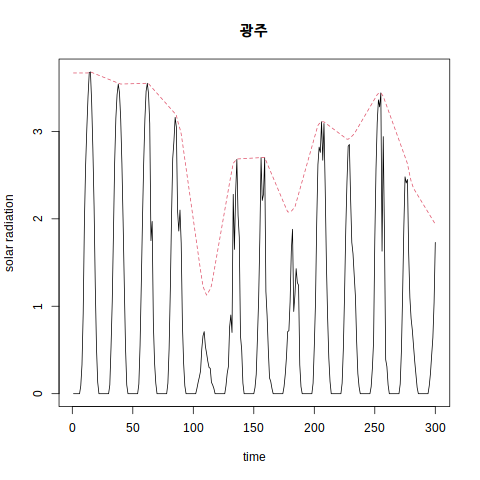

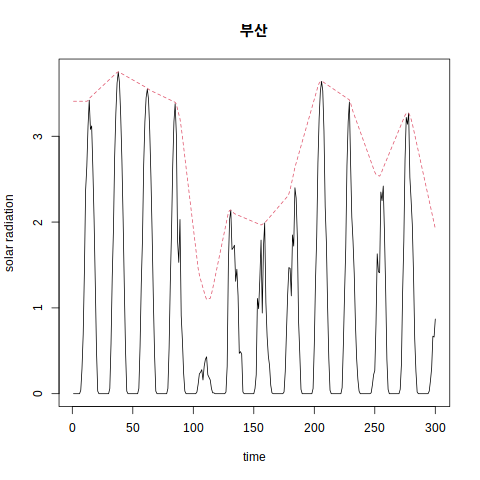

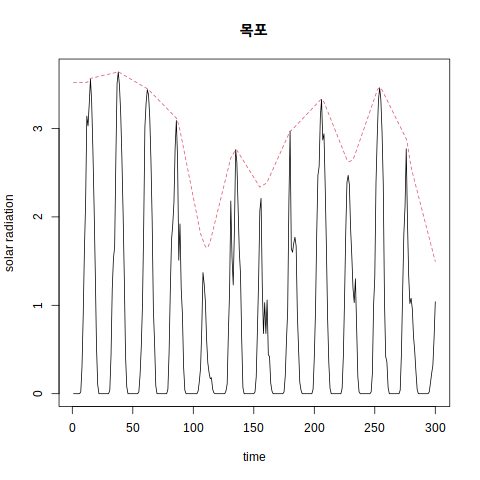

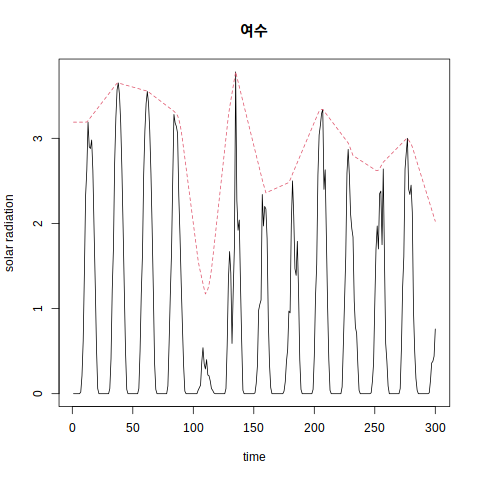

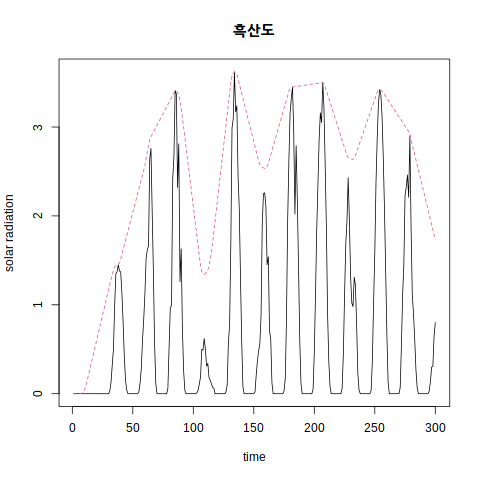

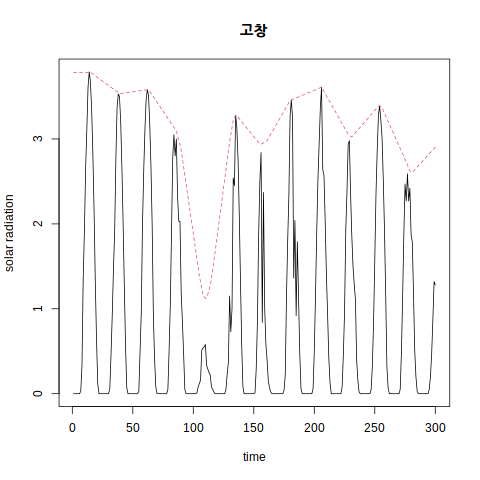

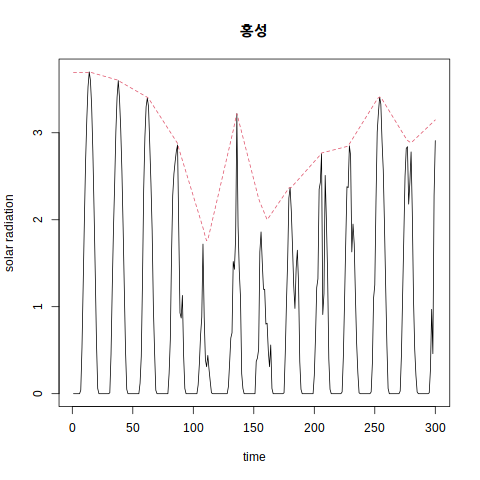

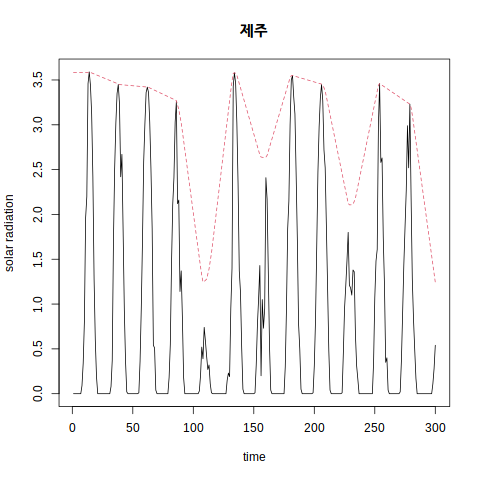

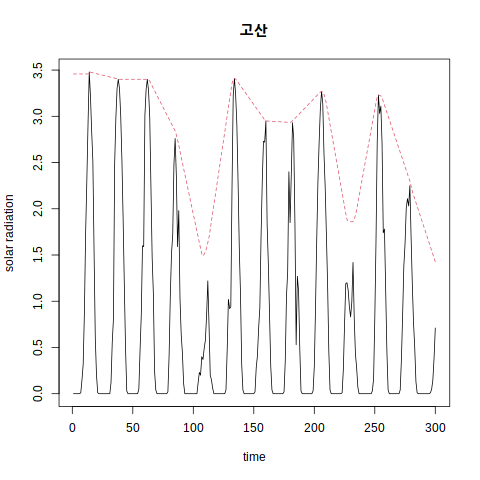

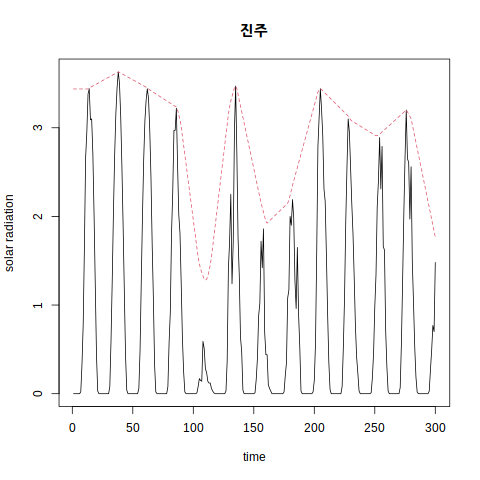

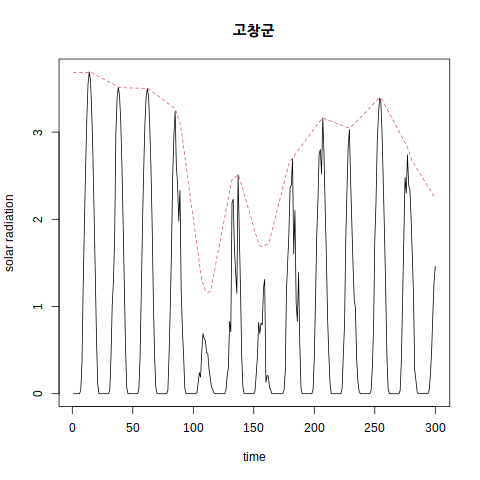

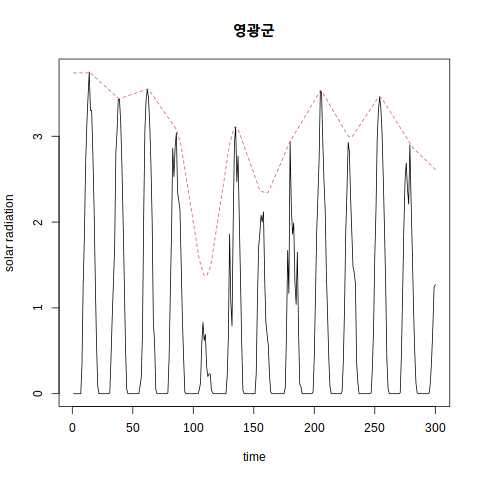

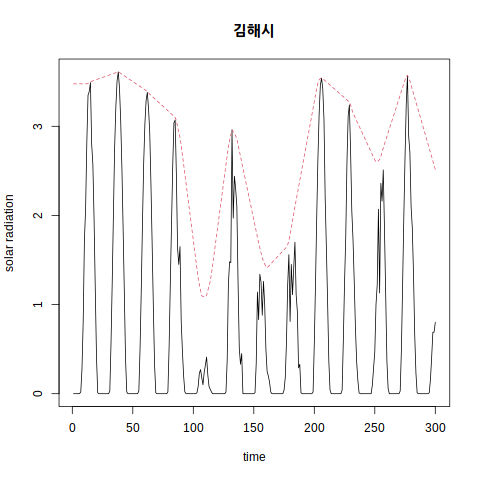

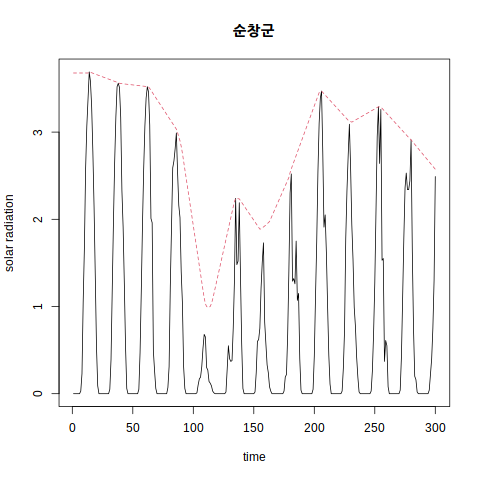

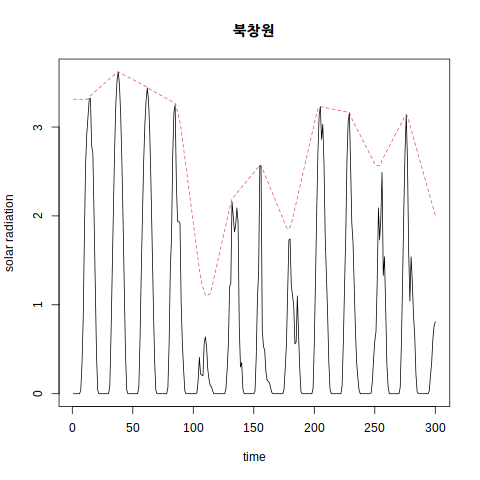

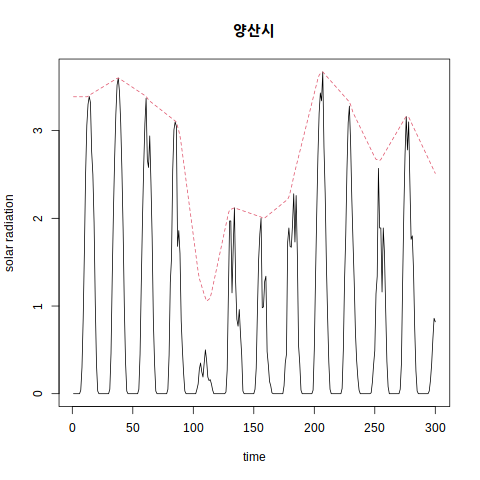

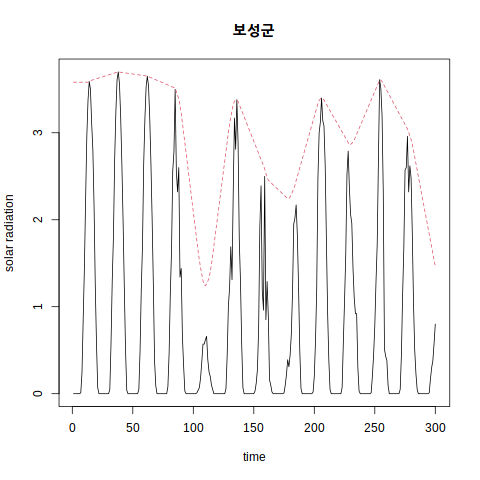

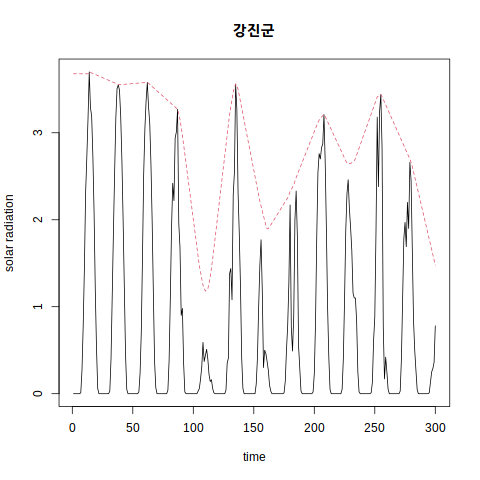

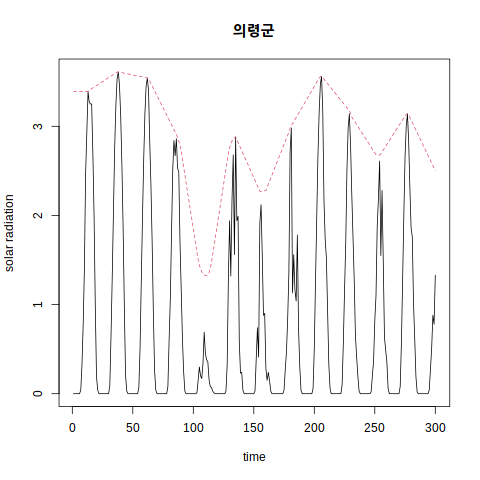

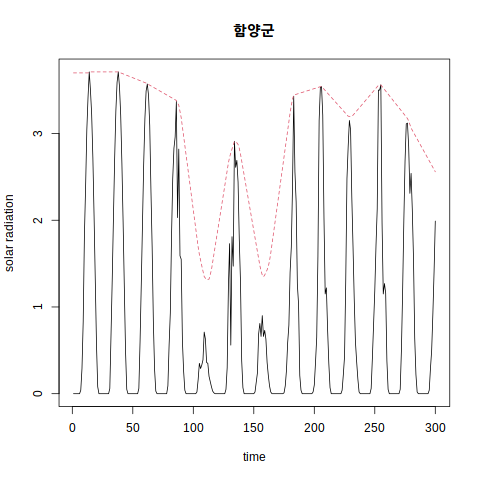

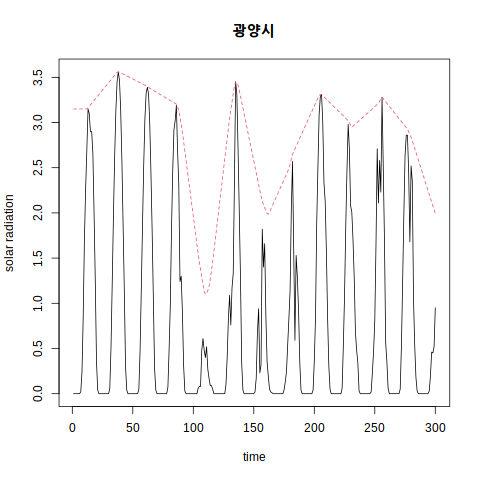

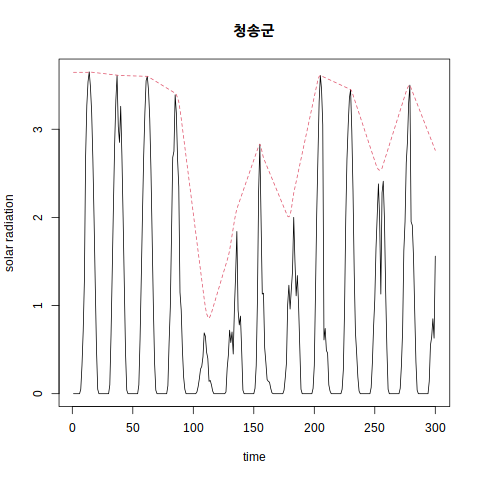

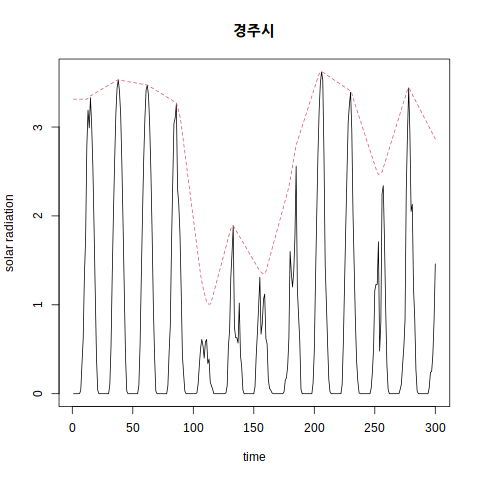

In [22]:
%%R
for (i in 1:44){
    plot(eval(parse(text=paste0('y',i)))[1:300], type='l', ann=FALSE)
    lines(yU[1:300,i],col = 2, lty=2)
    title(main = as.character(unique(train$region)[i]), xlab='time', ylab='solar radiation')
    }